In [37]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [40]:
max([max(sequence) for sequence in train_data])

9999

In [41]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [43]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [44]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [45]:
y_train = np.asarray(train_labels.astype('float32'))
y_test = np.asarray(test_labels.astype('float32'))

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [48]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [49]:
from keras import losses
from keras import metrics

model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=[metrics.binary_accuracy])

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5695 - accuracy: 0.7739 - val_loss: 0.4629 - val_accuracy: 0.8482
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3862 - accuracy: 0.8813 - val_loss: 0.3580 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9055 - val_loss: 0.3248 - val_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2355 - accuracy: 0.9219 - val_loss: 0.2836 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1995 - accuracy: 0.9344 - val_loss: 0.2850 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1697 - accuracy: 0.9453 - val_loss: 0.2777 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1478 - accuracy: 0.9519 - val_loss: 0.2832 - val_accuracy: 0.8860
Epoch 8/20
30/30 [=

In [52]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

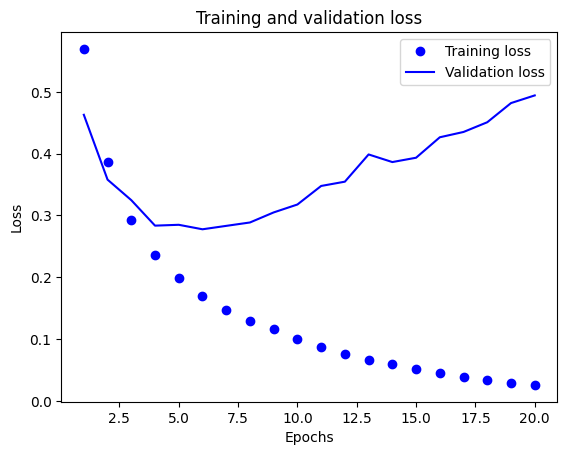

In [53]:

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

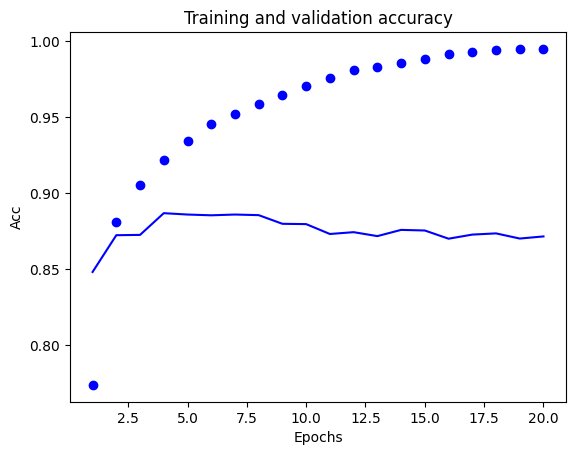

In [54]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.show()

In [55]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8094
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.8951
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9159
Epoch 4/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9282


In [56]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2797 - accuracy: 0.8880
